In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
pd.set_option("display.max_rows", 500, "display.max_columns", 500)

In [2]:
import tensorflow as tf
import itertools
from tensorflow import keras
from keras.models import Sequential, save_model, load_model
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [55]:
def display_data(filename):
    dataframe = pd.read_csv(filename, sep=";", low_memory=False)
    dataframe.dropna()
    return dataframe

data = display_data('data.csv')
data

,jobtitle,jobfield,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89,q90,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100,q101,q102,q103,q104,q105,q106,q107,q108,q109,q110,q111,q112,q113,q114,q115,q116,q117,q118,q119,q120,q121,q122,q123,q124,q125,q126,q127,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,q138,q139,q140,q141,q142,scale_e,scale_i,scale_s,scale_n,scale_t,scale_f,scale_j,scale_p,psychotype,satisfied
0,NaN,NaN,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,5,26,25,12,24,8,27,10,ISTJ,0
1,HR manager,Staff and training,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,16,22,17,16,23,11,22,15,ISTJ,1
2,HR manager,Staff and training,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,28,6,14,18,20,16,20,15,ENTJ,0
3,HR manager,Staff and training,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,28,10,22,10,16,14,22,12,ESTJ,1
4,HR manager,Staff and training,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,24,10,16,17,13,23,31,3,ENFJ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21841,NaN,NaN,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,25,15,17,20,13,13,19,15,ENTJ,0
21842,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,26,6,20,18,11,21,22,11,ESFJ,0
21843,NaN,NaN,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,16,21,22,1

In [56]:
# manipulating dataframe
cols = data.columns
data = data[cols[2:153]]
data

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89,q90,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100,q101,q102,q103,q104,q105,q106,q107,q108,q109,q110,q111,q112,q113,q114,q115,q116,q117,q118,q119,q120,q121,q122,q123,q124,q125,q126,q127,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,q138,q139,q140,q141,q142,scale_e,scale_i,scale_s,scale_n,scale_t,scale_f,scale_j,scale_p,psychotype
0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,5,26,25,12,24,8,27,10,ISTJ
1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,16,22,17,16,23,11,22,15,ISTJ
2,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,28,6,14,18,20,16,20,15,ENTJ
3,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,28,10,22,10,16,14,22,12,ESTJ
4,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,24,10,16,17,13,23,31,3,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21841,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,25,15,17,20,13,13,19,15,ENTJ
21842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,26,6,20,18,11,21,22,11,ESFJ
21843,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,16,21,22,11,28,5,25,9,ISTJ
21844,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0

In [57]:
# splitting data into attributes and classes
X = data[cols[2:144]].to_numpy()
y = data['psychotype'].to_numpy()

In [58]:
# storing class names
class_names = data['psychotype'].unique()

In [59]:
# Encoding categorical data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [60]:
def split_dataset(X, y, ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=50, shuffle = True)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_dataset(X, y, 0.3)

In [61]:
def build_NN(inp, out, act):
    #Initialising the ANN
    model = Sequential()
    
    # Adding the input layer and the first hidden layer
    model.add(Dense(32, input_dim = inp))
    model.add(LeakyReLU(0.2))

    # Adding the second hidden layer
    model.add(Dense(64))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    # Adding the third hidden layer
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    # Adding the output layer
    model.add(Dense(out, activation = act))

    return model

MLP = build_NN(X_train.shape[1], y_train.shape[1], "softmax")
MLP.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                4576      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128)              

In [62]:
def compiling_model(model):
    model.compile(optimizer=Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"), loss = 'categorical_crossentropy', metrics = ['accuracy'])

compiling_model(MLP)    

In [63]:
# Fitting the ANN to the Training set
history = MLP.fit(X_train, y_train, batch_size = 256, epochs = 250, validation_data=(X_test, y_test))

Epoch 1/250
60/60 [==============================] - 0s 4ms/step - loss: 2.1972 - accuracy: 0.3100 - val_loss: 1.5926 - val_accuracy: 0.4738
Epoch 2/250
60/60 [==============================] - 0s 3ms/step - loss: 1.4071 - accuracy: 0.5213 - val_loss: 1.0162 - val_accuracy: 0.6498
Epoch 3/250
60/60 [==============================] - 0s 4ms/step - loss: 0.9831 - accuracy: 0.6409 - val_loss: 0.6695 - val_accuracy: 0.7621
Epoch 4/250
60/60 [==============================] - 0s 3ms/step - loss: 0.7528 - accuracy: 0.7129 - val_loss: 0.5268 - val_accuracy: 0.8103
Epoch 5/250
60/60 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.7614 - val_loss: 0.4219 - val_accuracy: 0.8558
Epoch 6/250
60/60 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.7943 - val_loss: 0.3919 - val_accuracy: 0.8528
Epoch 7/250
60/60 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.8125 - val_loss: 0.3741 - val_accuracy: 0.8567
Epoch 8/250
6

In [64]:
# def save_model(model, model_name):
#     model.save(model_name)

# save_model(MLP, "Model_1.h5")

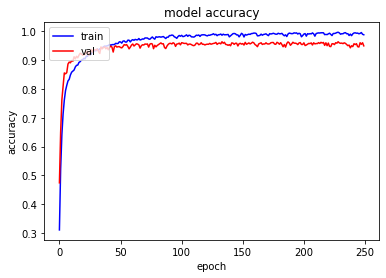

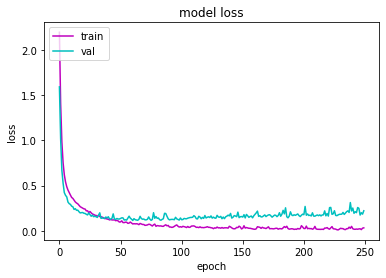

In [65]:
def plot_graphs(history):
    
    plt.plot(history.history['accuracy'], c= 'b')
    plt.plot(history.history['val_accuracy'], c='r')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

    plt.plot(history.history['loss'], c='m')
    plt.plot(history.history['val_loss'], c='c')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')

    plt.show()

plot_graphs(history)

In [74]:
# Predicting the Test set results
y_predict = MLP.predict(X_test)

In [75]:
print(classification_report(y_test.argmax(axis=1), y_predict.argmax(axis=1), target_names=class_names))

              precision    recall  f1-score   support

        ISTJ       0.98      0.88      0.93       235
        ENTJ       0.97      0.94      0.96       344
        ESTJ       0.96      0.94      0.95       508
        ENFJ       0.96      0.95      0.95       383
        ESTP       0.93      0.98      0.95       483
        ESFJ       0.83      0.96      0.89       122
        INTJ       0.98      0.98      0.98      1929
        INFJ       0.94      0.95      0.94       349
        ISFP       0.91      0.91      0.91       112
        ENFP       0.94      0.79      0.86       155
        ENTP       0.94      0.88      0.91       250
        INFP       0.94      0.91      0.92       211
        ISFJ       0.94      0.95      0.95       219
        ESFP       0.79      0.95      0.86        77
        ISTP       0.94      0.97      0.96       990
        INTP       0.89      0.91      0.90       187

    accuracy                           0.95      6554
   macro avg       0.93   

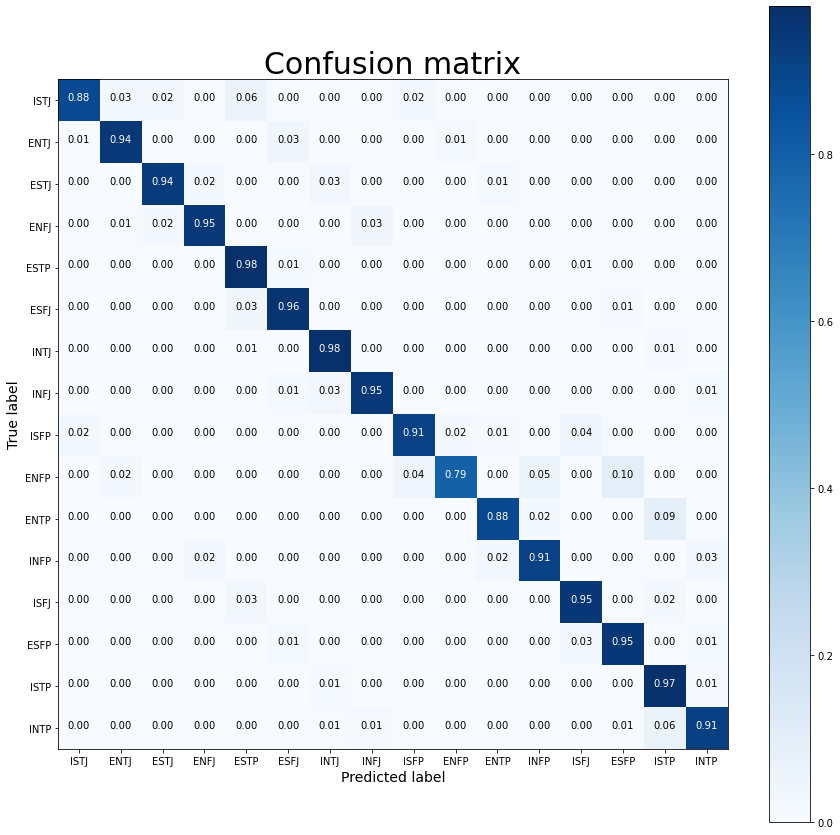

In [78]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black", fontsize = 10)

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    # plt.savefig('Confusion_matrix.jpg')

cm = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
plot_confusion_matrix(cm, class_names)

In [89]:
y_predict_labels = label_encoder.inverse_transform(np.argmax(y_predict, axis=1))
y_predict_labels

array(['ISTJ', 'ENTP', 'ISTJ', ..., 'ESTP', 'ENFP', 'ESTP'], dtype=object)